In [1]:
# Date: 8/23/2021
# Author: Shreesha Jagadeesh
# Purpose: Download CIFAR dataset and built classifier models using basic MLP

In [2]:
# %pip install tensorflow==2.4.1

In [3]:
# %pip install keras

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import numpy as np
from matplotlib import pyplot as plt
# %%display matplotlib inline

In [6]:
tf.random.set_seed(42)

from numpy.random import seed
seed(1)

# https://machinelearningmastery.com/reproducible-results-neural-networks-keras/

In [7]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

# This means that the x_train has 50k training data with each image being 32 x 32 pixels and 3 RGB dimensions for the color

In [8]:
type(x_train[0])

numpy.ndarray

In [9]:
# x_train[0]

[6]


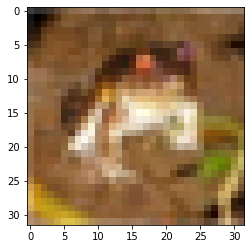

[9]


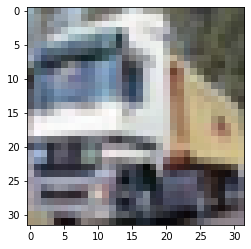

[9]


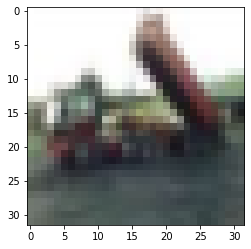

[4]


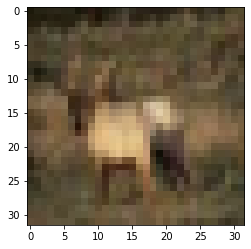

[1]


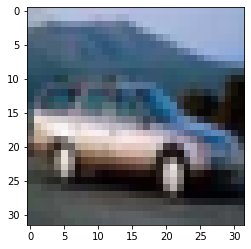

[1]


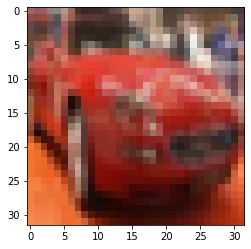

[2]


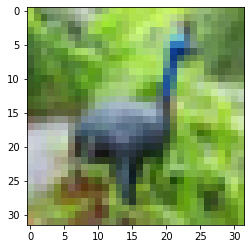

[7]


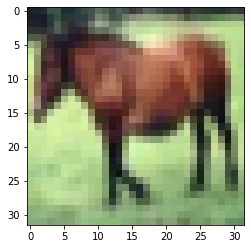

[8]


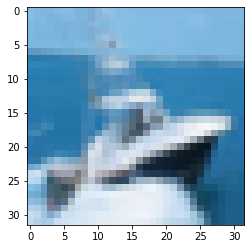

[3]


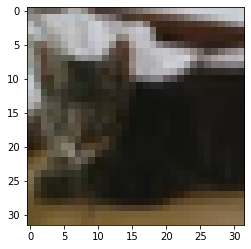

In [10]:
for i in range(10):
    print(y_train[i])
    plt.imshow(x_train[i])
    plt.show()
    
# Display the first 10 images from the cifar dataset

In [11]:
# len(x_train[0][0])

In [12]:
# Preprocess the image data to fit the input of MLP
# # scale
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
# What exactly does that mean? We need to convert the 32x32x3 into a 3072 dimension

x_train_reshaped = tf.reshape(x_train, (-1, 3072))
x_test_reshaped = tf.reshape(x_test, (-1, 3072))

# See https://stackoverflow.com/questions/47424411/reshaping-image-feed-to-tensorflow for code snippet

In [13]:
x_train_reshaped.shape, x_test_reshaped.shape

(TensorShape([50000, 3072]), TensorShape([10000, 3072]))

In [14]:
# print(x_train_reshaped[0], x_train[0])
# You can see how the ordering is preserved

In [15]:
# Step 5: Build Multi-Layer Perceptron for image classification with tf.keras functional API

# The inputs have dimension 3072 from unravelling the 32x32x3 images
# Aliter to the first step is to use the below but then the entire architecture will be different
# inputs = tf.keras.Input(shape=(32,32,3))

# keras.layers.Flatten(input_shape=train_images.shape[1:])

# inputs = tf.keras.layers.Flatten(input_shape = x_train.shape[1:])
inputs = tf.keras.Input(shape=(3072,))
x = tf.keras.layers.Dense(1024, activation="relu")(inputs)
x = tf.keras.layers.Dense(256, activation="relu")(x)
outputs = tf.keras.layers.Dense(10, activation="softmax")(x)

# Change the activation layer of the last one to be softmax so that its suitable to generate probabilities

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="cifar_mlp_model")

# The outputs are the 10 classes from the CIFAR dataset
model.summary()


# Between the Input and the first hidden layer you have 3072 x 1024 connections plus the bias connection * 1024 = 3146752

# Then you have 1024 x 256 + bias*256 = 262400

# And then finally between the last dense hidden layer and the output layer, you have 256*10 + bias*10 = 2570


Model: "cifar_mlp_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 3,411,722
Trainable params: 3,411,722
Non-trainable params: 0
_________________________________________________________________


In [16]:
# %pip install pydot graphviz

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
# 6. Evaluate the model and explore the trained MLP

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(),  metrics=['accuracy'])
# https://www.tensorflow.org/api_docs/python/tf/keras/losses
# Note that putting in regression metrics like MAE, MSE along with the loss function as accuracy/mae will NOT give you an error

# Like the Neural architecture doesnt care and doesn't know if you are doing a regression or classification
# Its upto the data scientist to define the type of Science problem

EPOCHS=5
history = model.fit(x_train_reshaped, y_train, validation_split = 0.2, epochs=EPOCHS, batch_size=100, verbose=1)

# I chose 1000 as the batch size and I get near similar performance as the author. 
#Having a larger batch size reduces the performance 

# Turns out if I don't scale my images, then I always end up getting performance no better than random
# Epochs, Batch Size, Test Accuracy
# 20, 1000 => 10% 
# 20, 100 -> 10%
# 20, 50 -> also around 10% but it started off around 20%
# 20, 64 -> also around 10%
# 5, 64 -> also around 10%

Epoch 1/5
400/400 [==============================] - 7s 16ms/step - loss: 2.2724 - accuracy: 0.2479 - val_loss: 1.7779 - val_accuracy: 0.3631
Epoch 2/5
400/400 [==============================] - 6s 15ms/step - loss: 1.7331 - accuracy: 0.3826 - val_loss: 1.6811 - val_accuracy: 0.4045
Epoch 3/5
400/400 [==============================] - 6s 15ms/step - loss: 1.6485 - accuracy: 0.4101 - val_loss: 1.6529 - val_accuracy: 0.4215
Epoch 4/5
400/400 [==============================] - 6s 15ms/step - loss: 1.5754 - accuracy: 0.4388 - val_loss: 1.6370 - val_accuracy: 0.4161
Epoch 5/5
400/400 [==============================] - 6s 15ms/step - loss: 1.5185 - accuracy: 0.4582 - val_loss: 1.5740 - val_accuracy: 0.4433


In [34]:
# # Alternative formulation of the problem using CategoricalCrossentropy doesn't work and gives the error message
# ValueError: Shapes (1000, 1) and (1000, 10) are incompatible
# model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
# history = model.fit(x_train_reshaped, y_train, validation_split = 0.2, epochs=EPOCHS, batch_size=1000, verbose=1)

# I suspect its because with the categorical crossentropy, you need to encode the labels as OHE, Stackoverflow
# https://stackoverflow.com/questions/59787897/how-does-tensorflow-sparsecategoricalcrossentropy-work

Epoch 1/20


ValueError: in user code:

    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:756 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1537 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4833 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /home/paperspace/anaconda3/envs/fastai2/lib/python3.7/site-packages/tensorflow/python/framework/tensor_shape.py:1134 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (1000, 1) and (1000, 10) are incompatible


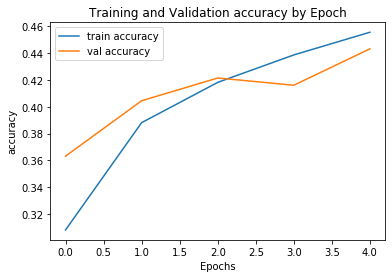

In [19]:
import pandas as pd
hist = pd.DataFrame(history.history)

hist['epoch'] = history.epoch

import matplotlib.pyplot as plt
plt.plot(hist['epoch'], hist['accuracy'], label = "train accuracy")
plt.plot(hist['epoch'], hist['val_accuracy'], label = "val accuracy")
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation accuracy by Epoch')
plt.legend()
plt.show()


# Makes sense that the validation and the training accuracy increase with the no. of epochs (there is still room for growth)
# Note that the validation grows less fast as the train

# Note if you see oscillation in the validation, that means your performance is influenced heavily by noise 
# and the model is not learning anything
# Same goes if you always see overlap between the training and the validation set

In [20]:
y_pred = model.predict(x_test_reshaped)
print(y_test.shape, y_pred.shape)
# The predictions are generated 

(10000, 1) (10000, 10)


In [21]:
y_pred
# Seems the predictions are generated for each class

array([[0.00766164, 0.01018796, 0.1080206 , ..., 0.00780561, 0.02907773,
        0.0016527 ],
       [0.01241527, 0.33336663, 0.00108227, ..., 0.00066451, 0.07934532,
        0.57041556],
       [0.08356566, 0.19499843, 0.0077711 , ..., 0.00596798, 0.3910511 ,
        0.306341  ],
       ...,
       [0.00236997, 0.0013495 , 0.04613479, ..., 0.04517502, 0.03415295,
        0.00514569],
       [0.00491565, 0.00875325, 0.08986079, ..., 0.08570959, 0.00483547,
        0.0058797 ],
       [0.03512008, 0.00781887, 0.15263635, ..., 0.42824695, 0.01483851,
        0.01402498]], dtype=float32)

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred.argmax(axis=1))

# Class 2 and 4 is doing really bad

# Pro tip: if you see a model where its predicting as beloinging to a single class, then there is a mistake somewhere
# So whats happening is that the prediction probabilities are very close to 10% anyway and 
# a slight increase is enough to tip off to a single class. This would imply a noise dataset that is impossible to learn from
# So check your scaling

array([[435,  94,  41,  27,   9,  84,  18,  53, 147,  92],
       [ 10, 655,   7,  28,   2,  56,  19,  53,  52, 118],
       [ 81,  40, 295,  77,  47, 197, 107, 101,  35,  20],
       [ 17,  29,  62, 240,  14, 404,  85,  69,  34,  46],
       [ 50,  17, 181,  49, 217, 169, 114, 146,  28,  29],
       [ 11,  25,  72, 127,  19, 521,  74,  94,  34,  23],
       [  3,  27,  97,  91,  47, 174, 481,  48,  16,  16],
       [ 16,  33,  51,  50,  38, 147,  26, 546,  19,  74],
       [ 78, 131,  12,  15,  10,  58,   8,  25, 566,  97],
       [ 12, 241,   4,  32,   4,  65,  27,  58,  50, 507]])

In [23]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,  y_test, verbose=0)

In [24]:
test_loss, test_accuracy

(1.5501230955123901, 0.4462999999523163)

In [25]:
model.predict(x_test_reshaped)

array([[0.00766164, 0.01018796, 0.1080206 , ..., 0.00780561, 0.02907773,
        0.0016527 ],
       [0.01241527, 0.33336663, 0.00108227, ..., 0.00066451, 0.07934532,
        0.57041556],
       [0.08356566, 0.19499843, 0.0077711 , ..., 0.00596798, 0.3910511 ,
        0.306341  ],
       ...,
       [0.00236997, 0.0013495 , 0.04613479, ..., 0.04517502, 0.03415295,
        0.00514569],
       [0.00491565, 0.00875325, 0.08986079, ..., 0.08570959, 0.00483547,
        0.0058797 ],
       [0.03512008, 0.00781887, 0.15263635, ..., 0.42824695, 0.01483851,
        0.01402498]], dtype=float32)

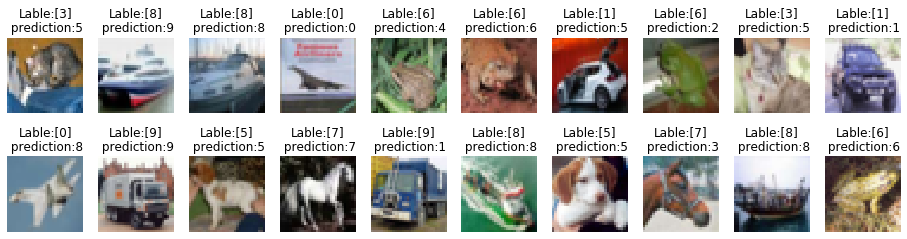

In [26]:
# Plot some examples and check the model’s prediction

plt.figure( figsize=(16,4) )
for i in range(20):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].reshape(32,32,3), cmap='gray', interpolation='none')
    plt.title("Label:{}\n prediction:{}".format(y_test[i], y_pred.argmax(axis = 1)[i]))
    plt.axis('off')
    
    
# Model seems to confuse boat and the plane a lot.
# Perhaps see if you could build a binary classifier on top of ALL the predictions between these two classes
# that uses an uncorrelated set of modelling methods

# Also some interesting mistakes like between Class 5 (dog) and Class 1 (car) probably because of the tail

In [27]:
# Qustions to the author: why do you get a better accuracy despite using fewer epochs? Does it have to do with the random seed
# Where do you set the random seed?
# I have set the learnign rate as 0.01 which is 10x higher than the default that you have used.

### CNN